<a href="https://colab.research.google.com/github/bonareri/Python-Data-Analysis-Projects/blob/main/FAANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [1]:
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For handling missing values
import numpy as np

# For date and time operations
import datetime

In [2]:
# Dictionary to store company names and file paths
company_files = {
    'Facebook': '/content/Facebook.csv',
    'Amazon': '/content/Amazon.csv',
    'Apple': '/content/Apple.csv',
    'Netflix': '/content/Netflix.csv',
    'Google': '/content/Google.csv'
}

# List to store DataFrames for each company
company_dataframes = []

# Loop through the dictionary to load each file
for company_name, file_path in company_files.items():
    # Load the CSV file into a DataFrame
    company_data = pd.read_csv(file_path)
    # Add a column indicating the company name
    company_data['Company'] = company_name
    # Append the DataFrame to the list
    company_dataframes.append(company_data)

# Combine all company DataFrames into a single DataFrame
faang_data = pd.concat(company_dataframes, ignore_index=True)

# Preview the combined dataset
print(faang_data.head())


         Date       Open       High        Low      Close  Adj Close  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   

        Volume   Company  
0  573576400.0  Facebook  
1  168192700.0  Facebook  
2  101786600.0  Facebook  
3   73600000.0  Facebook  
4   50237200.0  Facebook  


In [3]:
# Ensuring the Date column is in datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

In [ ]:
# Check the shape of the dataset
print(f"Dataset shape: {faang_data.shape}")

Dataset shape: (26566, 8)


In [ ]:
faang_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26566 entries, 0 to 26565
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       26566 non-null  datetime64[ns]
 1   Open       26565 non-null  float64       
 2   High       26565 non-null  float64       
 3   Low        26565 non-null  float64       
 4   Close      26565 non-null  float64       
 5   Adj Close  26565 non-null  float64       
 6   Volume     26565 non-null  float64       
 7   Company    26566 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.6+ MB


In [ ]:
# Check for missing values
print(faang_data.isnull().sum())

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
Company      0
dtype: int64


In [4]:
# Columns to handle missing values
columns_to_fill = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Apply Forward Fill for all specified columns
faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='ffill')

# Apply Backward Fill to handle any remaining missing values (if any)
faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='bfill')

# Verify if missing values are handled
print(faang_data[columns_to_fill].isnull().sum())

# Preview the cleaned data
print(faang_data.head())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
        Date       Open       High        Low      Close  Adj Close  \
0 2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000   
1 2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999   
2 2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000   
3 2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   
4 2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   

        Volume   Company  
0  573576400.0  Facebook  
1  168192700.0  Facebook  
2  101786600.0  Facebook  
3   73600000.0  Facebook  
4   50237200.0  Facebook  


<ipython-input-4-6fb7fa53c662>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='ffill')
<ipython-input-4-6fb7fa53c662>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  faang_data[columns_to_fill] = faang_data[columns_to_fill].fillna(method='bfill')


In [ ]:
#check for missing values
print(faang_data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64


## Exploratory Data Analysis (EDA)

In [ ]:
# Summary Statistics
print(faang_data.describe())

# Check unique companies
print(faang_data['Company'].unique())


                                Date          Open          High  \
count                          26566  26566.000000  26566.000000   
mean   2007-06-23 01:48:40.816080640    190.399567    192.458540   
min              1980-12-12 00:00:00      0.049665      0.049665   
25%              2002-04-29 06:00:00      1.658571      1.700000   
50%              2009-07-07 00:00:00     33.602501     34.273571   
75%              2015-05-13 00:00:00    193.047497    195.295002   
max              2020-09-04 00:00:00   3251.060059   3344.290039   
std                              NaN    379.614171    383.518301   

                Low         Close     Adj Close        Volume  
count  26566.000000  26566.000000  26566.000000  2.656600e+04  
mean     188.199207    190.421641    190.217790  1.369662e+08  
min        0.049107      0.049107      0.038743  2.856000e+05  
25%        1.628303      1.656473      1.628571  6.040875e+06  
50%       33.075001     33.742142     33.490002  1.855965e+07  
75%

In [ ]:
# Group by 'Company' and calculate the required metrics
volume_stats = (
    faang_data.groupby('Company')
    .agg(
        total_volume=('Volume', 'sum'),
        mean_monthly_volume=('Volume', 'mean'),
        max_monthly_volume=('Volume', 'max'),
        min_monthly_volume=('Volume', 'min')
    )
    .reset_index()
)

# Display the resulting DataFrame
print(volume_stats)

    Company  total_volume  mean_monthly_volume  max_monthly_volume  \
0    Amazon  4.396416e+10         7.512673e+06        1.043292e+08   
1     Apple  3.418317e+12         3.412856e+08        7.421641e+09   
2  Facebook  6.779228e+10         3.265524e+07        5.735764e+08   
3    Google  2.792251e+10         6.909802e+06        8.215110e+07   
4   Netflix  8.064926e+10         1.760516e+07        3.234140e+08   

   min_monthly_volume  
0            487200.0  
1           1388800.0  
2           5913100.0  
3            520600.0  
4            285600.0  


In [ ]:
import plotly.express as px

# Group by company and calculate total volume
total_volume = faang_data.groupby('Company')['Volume'].sum().sort_values(ascending=False).reset_index()

# Create an interactive bar plot using Plotly
fig = px.bar(total_volume,
             x='Company',
             y='Volume',
             title='Total Trading Volume by Company',
             labels={'Volume': 'Total Volume', 'Company': 'Company'},
             color='Company')

# Show the plot
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Data for the summary of trading volume statistics
volume_stats = pd.DataFrame({
    'Company': ['Amazon', 'Apple', 'Facebook', 'Google', 'Netflix'],
    'Total Volume': [4.396416e+10, 3.418317e+12, 6.779228e+10, 2.792251e+10, 8.064926e+10],
    'Mean Monthly Volume': [7.512673e+06, 3.412856e+08, 3.265524e+07, 6.909802e+06, 1.760516e+07],
    'Max Monthly Volume': [1.043292e+08, 7.421641e+09, 5.735764e+08, 8.215110e+07, 3.234140e+08],
    'Min Monthly Volume': [487200.0, 1388800.0, 5913100.0, 520600.0, 285600.0]
})

# Melt the dataframe for easier visualization
volume_stats_melted = volume_stats.melt(id_vars='Company',
                                         value_vars=['Total Volume', 'Mean Monthly Volume', 'Max Monthly Volume', 'Min Monthly Volume'],
                                         var_name='Metric',
                                         value_name='Volume')

# Create the grouped bar chart
fig = px.bar(volume_stats_melted,
             x='Company',
             y='Volume',
             color='Metric',
             barmode='group',  # Group bars together for each company
             title='Comparison of Monthly Trading Volume Metrics for FAANG Companies',
             labels={'Volume': 'Volume', 'Company': 'Company', 'Metric': 'Metrics'},
             category_orders={'Metric': ['Total Volume', 'Mean Monthly Volume', 'Max Monthly Volume', 'Min Monthly Volume']})

# Update layout for better readability
fig.update_layout(
    xaxis_title="Company",
    yaxis_title="Volume",
    legend_title="Metrics",
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels for readability
    showlegend=True  # Ensure the legend is displayed
)

# Show the figure
fig.show()

In [ ]:
import pandas as pd

# Assuming you have the 'faang_data' DataFrame already loaded

# Convert 'Date' column to datetime
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Extract year and month from 'Date' to group by month
faang_data['YearMonth'] = faang_data['Date'].dt.to_period('M')

# Group by Company and YearMonth to get monthly trading volume
monthly_volume = faang_data.groupby(['Company', 'YearMonth'])['Volume'].sum().reset_index()

# Calculate the mean and standard deviation of monthly volume for each company
volume_stats = monthly_volume.groupby('Company')['Volume'].agg(['mean', 'std'])

# Merge the stats back to the original monthly data
monthly_volume = monthly_volume.merge(volume_stats, on='Company', how='left')

# Define a threshold for "high" monthly volume (e.g., 2 standard deviations above the mean)
monthly_volume['High Volume'] = monthly_volume['Volume'] > (monthly_volume['mean'] + 2 * monthly_volume['std'])

# Filter for the high volume periods
high_volume_data = monthly_volume[monthly_volume['High Volume']]

# Print the high volume periods
print(high_volume_data[['YearMonth', 'Company', 'Volume']])


     YearMonth  Company        Volume
13     1998-06   Amazon  5.838786e+08
14     1998-07   Amazon  6.639468e+08
15     1998-08   Amazon  4.406076e+08
16     1998-09   Amazon  6.778356e+08
17     1998-10   Amazon  5.044446e+08
...        ...      ...           ...
1168   2012-01  Netflix  1.829323e+09
1169   2012-02  Netflix  1.002674e+09
1174   2012-07  Netflix  9.880451e+08
1177   2012-10  Netflix  1.114315e+09
1180   2013-01  Netflix  9.919091e+08

[62 rows x 3 columns]


In [ ]:
import plotly.graph_objects as go

# Create a bar chart
fig = go.Figure()

# Add bars for each company's monthly trading volume
for company in monthly_volume['Company'].unique():
    company_data = monthly_volume[monthly_volume['Company'] == company]
    fig.add_trace(go.Bar(
        x=company_data['YearMonth'],
        y=company_data['Volume'],
        name=company
    ))

# Highlight the high-volume periods
fig.add_trace(
    go.Scatter(
        x=high_volume_data['YearMonth'],
        y=high_volume_data['Volume'],
        mode='markers',
        marker=dict(color='red', size=10, symbol='x'),
        name='High Volume'
    )
)

# Customize layout
fig.update_layout(
    title='Monthly Trading Volume Trends of FAANG Companies with High Volume Annotations',
    xaxis_title='Month',
    yaxis_title='Trading Volume',
    barmode='stack',  # Stacked bars for each company
    xaxis=dict(tickformat='%b %Y')  # Format x-axis for date display
)

# Show the plot
fig.show()

TypeError: Type is not JSON serializable: Period

In [ ]:
import plotly.express as px
import pandas as pd

# Data for the summary of trading volume statistics
volume_stats = pd.DataFrame({
    'Company': ['Amazon', 'Apple', 'Facebook', 'Google', 'Netflix'],
    'Total Volume': [4.396416e+10, 3.418317e+12, 6.779228e+10, 2.792251e+10, 8.064926e+10],
    'Mean Monthly Volume': [7.512673e+06, 3.412856e+08, 3.265524e+07, 6.909802e+06, 1.760516e+07],
    'Max Monthly Volume': [1.043292e+08, 7.421641e+09, 5.735764e+08, 8.215110e+07, 3.234140e+08],
    'Min Monthly Volume': [487200.0, 1388800.0, 5913100.0, 520600.0, 285600.0]
})

# Set 'Company' as the index for easy plotting
volume_stats.set_index('Company', inplace=True)

# Create a heatmap using Plotly Express
fig = px.imshow(volume_stats,
                text_auto=True,  # Show the values inside the cells
                color_continuous_scale='Viridis',  # Choose a color scale (you can change this)
                title='Heatmap of Monthly Trading Volume Metrics for FAANG Companies')

# Update layout for better readability
fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Company",
    coloraxis_colorbar_title="Volume",  # Title for the color scale
)

# Show the figure
fig.show()

### Summary of Monthly Trading Volume Statistics

This table summarizes the trading volumes for all companies, showing their total volume, mean monthly volume, maximum, and minimum values. Here's a detailed breakdown:

### Insights:

- **Apple Dominates Trading Activity**:
  - With the highest total volume (3.42 trillion) and mean monthly volume (341.29 million), Apple shows strong investor interest and high liquidity in its shares.
  - Apple also recorded the highest maximum monthly volume (7.42 billion), indicating that the company experiences occasional market events that significantly boost trading activity.
  - The large fluctuations between its max (7.42 billion) and min (1.39 million) volumes suggest periods of intense activity and sharp declines.

- **Netflix Shows Significant Volatility**:
  - Netflix has a relatively low mean monthly volume (17.61 million), but its maximum monthly volume (323.41 million) indicates substantial spikes in interest during certain months.
  - This volatility suggests that while Netflix does not consistently trade at high volumes, there are specific periods where investor interest peaks significantly.

- **Amazon’s Consistent Activity**:
  - Amazon has a moderate total volume (43.96 billion), and its mean monthly volume (7.51 million) is comparatively low, indicating more stable trading without sharp spikes.
  - Despite lower trading volume than Apple and Netflix, Amazon still maintains a solid presence in the market, with a max volume of 104.33 million, reflecting healthy investor interest.

- **Google’s Quiet Months**:
  - Google exhibits some of the lowest trading volumes in comparison, with a minimum of just 520,600 shares, which suggests periods of reduced market interest or quieter trading months.
  - Despite this, its maximum monthly volume (82.15 million) indicates that there are occasional spikes in investor interest, although these spikes are not as extreme as Apple or Netflix.

- **Facebook’s Stable but Lower Volume**:
  - Facebook shows a moderate total volume (67.79 billion) and a mean monthly volume (32.66 million), indicating consistent, albeit lower, trading activity compared to Apple.
  - The maximum monthly volume (573.58 million) is notable but still far behind Apple’s trading spike, reflecting steady but less intense market interest.

This summary provides a snapshot of each company's trading dynamics, showing the relative intensity and variability of their trading activity over the dataset period.

In [ ]:
import plotly.express as px

# Ensure Date is in datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Resample to monthly data for each company
faang_monthly = faang_data.groupby('Company').resample('M', on='Date').mean().reset_index()

# Calculate additional statistics for interactivity
stats = faang_monthly.groupby('Company').agg(
    mean_close_price=('Close', 'mean'),
    volatility=('Close', 'std'),
    max_close_price=('Close', 'max')
).reset_index()

# Merge calculated stats back with the monthly data
faang_monthly = faang_monthly.merge(stats, on='Company', how='left')

# Add a 'Year' column for hover information
faang_monthly['Year'] = faang_monthly['Date'].dt.year

# Create an interactive Plotly line chart
fig = px.line(
    faang_monthly,
    x='Date',
    y='Close',
    color='Company',
    title='Monthly Average Stock Close Prices',
    labels={'Close': 'Close Price', 'Date': 'Date'},
    hover_data={
        'Year': True,
        'mean_close_price': ':.2f',
        'volatility': ':.2f',
        'max_close_price': ':.2f'
    }
)

# Customize layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Company',
    hovermode='x unified'
)

# Show the plot
fig.show()

<ipython-input-24-fb3d665b7b1f>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



# **Summary of FAANG Monthly Stock Analysis**

## **Monthly Average Close Prices Summary**
- **Amazon**:
  - Highest mean close price: **381.59**.
  - High volatility: **606.87** standard deviation.
  - Maximum monthly close price: **3154.83** reflects significant growth.

- **Google**:
  - Second-highest mean close price: **537.18**, with moderate volatility (**389.85** std).
  - Maximum close price: **1645.80**, highlighting its dominance.

- **Netflix**:
  - Mean close price: **79.59**, but high volatility (**121.22** std).
  - Maximum value: **499.39**, reflecting growth from global streaming expansion.

- **Facebook**:
  - Mean close price: **117.39**, with relatively stable volatility (**62.43** std).
  - Maximum close price: **259.14**, indicative of growth since its 2012 IPO.

- **Apple**:
  - Lowest average close price: **9.27** (likely influenced by stock splits).
  - Maximum value: **134.18**, showing steady growth compared to peers.


---

## **Sample of Downsampled Data (Amazon)**
- Early data from 1997 shows a steady increase in close prices:
  - May 1997: **1.58**, reaching **5.29** by February 1998.
- Positive monthly returns in most months suggest consistent growth.
- Fluctuating trading volumes indicate varying levels of investor interest.

---

## **Key Insights**
1. **Growth Trends**:
   - Amazon and Google exhibit higher mean close prices, showcasing dominant market positions.
   - Apple’s lower mean price reflects stock splits but consistent growth.

2. **Volatility**:
   - Higher volatility for Amazon, Netflix, and Google indicates significant price swings.
   - Facebook shows stable growth with lower price variability.

3. **Early Growth**:
   - Amazon’s rapid price appreciation since its 1997 IPO highlights its e-commerce transformation.

4. **Investor Interest**:
   - Volume data suggests periods of heightened trading activity linked to major events.

---

## **Actionable Ideas**
- **Event Analysis**: Investigate price trends alongside historical events (e.g., product launches, crises).
- **Comparative Analysis**: Compare stock performance during pivotal periods like the 2008 financial crisis or COVID-19 pandemic.
- **Forecasting**: Leverage this data to build predictive models for stock prices or trading volumes.

---

In [ ]:
# Print a summary of the resampled data
print("Monthly Average Close Prices Summary (First Few Rows):")
print(faang_monthly.groupby('Company')['Close'].describe())

# Preview the first few rows of the resampled data
print("\nSample of Downsampled Data:")
print(faang_monthly.head(10))  # Adjust the number of rows as needed

Monthly Average Close Prices Summary (First Few Rows):
          count        mean         std        min         25%         50%  \
Company                                                                      
Amazon    280.0  381.585850  606.866311   1.537699   38.182809   83.301591   
Apple     478.0    9.266662   17.740092   0.057318    0.271876    0.435302   
Facebook  100.0  117.388546   62.432349  20.108261   66.912631  118.253332   
Google    194.0  537.177819  389.853619  52.683795  242.623601  343.284095   
Netflix   220.0   79.590965  121.221228   0.560217    3.750701   15.655714   

                 75%          max  
Company                            
Amazon    363.180858  3154.831982  
Apple      10.505837   134.179993  
Facebook  173.352495   259.140834  
Google    796.341541  1645.797485  
Netflix    99.628361   499.385003  

Sample of Downsampled Data:
  Company       Date      Open      High       Low     Close  Adj Close  \
0  Amazon 1997-05-31  1.686553  1.722538  

In [ ]:
# Sort by Date
faang_data.sort_values(by='Date', inplace=True)

# Calculate daily percentage change
faang_data['Daily Return'] = faang_data.groupby('Company')['Close'].pct_change()

# Preview daily returns
print(faang_data[['Date', 'Company', 'Daily Return']].tail())

             Date Company  Daily Return
17943  2020-09-01   Apple      0.039833
26562  2020-09-01  Google      0.015679
26563  2020-09-02  Google      0.037648
26564  2020-09-03  Google     -0.051171
26565  2020-09-04  Google     -0.029641


In [ ]:
# Summarize monthly trading volume data
volume_summary = faang_monthly_volume.groupby('Company').agg(
    total_volume=('Volume', 'sum'),
    mean_monthly_volume=('Volume', 'mean'),
    max_monthly_volume=('Volume', 'max'),
    min_monthly_volume=('Volume', 'min')
).reset_index()

# Display the first few rows of the downsampled data for context
print("Sample of Monthly Trading Volume Data:")
print(faang_monthly_volume.head())

# Display the summary of trading volume
print("\nSummary of Monthly Trading Volume Statistics:")
print(volume_summary)

Sample of Monthly Trading Volume Data:
  Company       Date       Volume
0  Amazon 1989-03-31  194908800.0
1  Amazon 1989-04-30  105637200.0
2  Amazon 1989-05-31   43791600.0
3  Amazon 1989-06-30   59733600.0
4  Amazon 1989-07-31   86528400.0

Summary of Monthly Trading Volume Statistics:
    Company  total_volume  mean_monthly_volume  max_monthly_volume  \
0    Amazon  4.396416e+10         2.456099e+08        8.114012e+08   
1     Apple  3.418317e+12         2.896879e+10        1.085279e+11   
2  Facebook  6.779228e+10         6.847705e+08        1.774149e+09   
3    Google  2.792251e+10         6.980628e+08        2.484341e+09   
4   Netflix  8.064926e+10         1.792206e+09        6.475908e+09   

   min_monthly_volume  
0        4.379160e+07  
1        1.434966e+09  
2        2.560592e+08  
3        1.090373e+07  
4        2.085346e+08  


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

# Define FAANG ticker symbols
tickers = ['AMZN', 'AAPL', 'META', 'GOOGL', 'NFLX']

# Fetch stock prices
stock_prices = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)
    stock_prices[ticker] = stock.history(period='1d')['Close'][0]  # Latest closing price

# Display results
for ticker, price in stock_prices.items():
    print(f"{ticker}: ${price:.2f}")

<ipython-input-10-3b0b99a43d72>:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-10-3b0b99a43d72>:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



AMZN: $204.61
AAPL: $228.28
META: $561.09
GOOGL: $178.12
NFLX: $871.32


<ipython-input-10-3b0b99a43d72>:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-10-3b0b99a43d72>:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-10-3b0b99a43d72>:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
# Sort the data by Date for each company
faang_data['Date'] = pd.to_datetime(faang_data['Date'])
faang_data = faang_data.sort_values(by=['Company', 'Date'])

# Calculate percentage growth for each company
growth_data = []
for company in company_files.keys():
    # Get the first and last closing prices for each company
    first_close = faang_data[faang_data['Company'] == company]['Close'].iloc[0]
    last_close = faang_data[faang_data['Company'] == company]['Close'].iloc[-1]

    # Calculate percentage growth
    percentage_growth = ((last_close - first_close) / first_close) * 100
    growth_data.append({'Company': company, 'Percentage Growth': percentage_growth})

# Convert to a DataFrame
growth_df = pd.DataFrame(growth_data)

# Sort by percentage growth
growth_df = growth_df.sort_values(by='Percentage Growth', ascending=False)

# Display the growth data
print(growth_df)

    Company  Percentage Growth
1    Amazon      160649.985830
2     Apple      104443.890828
3   Netflix       41575.686146
4    Google        3048.552500
0  Facebook         586.215004


In [ ]:
import pandas as pd
import plotly.express as px

# Ensure Date is in datetime format and sort by Company and Date
faang_data['Date'] = pd.to_datetime(faang_data['Date'])
faang_data = faang_data.sort_values(by=['Company', 'Date'])

# Calculate the percentage growth for each company
growth_data = []
for company in company_files.keys():
    # Get the first and last closing prices for each company
    first_close = faang_data[faang_data['Company'] == company]['Close'].iloc[0]
    last_close = faang_data[faang_data['Company'] == company]['Close'].iloc[-1]

    # Calculate percentage growth
    percentage_growth = ((last_close - first_close) / first_close) * 100
    growth_data.append({'Company': company, 'Percentage Growth': percentage_growth})

# Convert to a DataFrame
growth_df = pd.DataFrame(growth_data)

# Find the company with the highest growth
highest_growth_company = growth_df.sort_values(by='Percentage Growth', ascending=False).iloc[0]
highest_growth_company_name = highest_growth_company['Company']
highest_growth_percentage = highest_growth_company['Percentage Growth']

# Visualize the stock performance over time with Plotly
fig = px.line(faang_data, x='Date', y='Close', color='Company',
              title='Stock Performance of FAANG Companies Over Time',
              labels={'Close': 'Stock Price (Closing)', 'Date': 'Date'},
              markers=True)

# Annotate the highest growth company on the plot
fig.add_annotation(
    x=faang_data[faang_data['Company'] == highest_growth_company_name]['Date'].iloc[-1],
    y=faang_data[faang_data['Company'] == highest_growth_company_name]['Close'].iloc[-1],
    text=f'{highest_growth_company_name} ({highest_growth_percentage:.2f}%) Growth',
    showarrow=True,
    arrowhead=2,
    font=dict(size=12, color="black"),
    align="center"
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'faang_data' contains 'Date', 'Company', and 'Close' columns

# Convert the 'Date' column to datetime
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Plot the line chart for closing prices over time
fig = px.line(faang_data, x='Date', y='Close', color='Company',
              title='Stock Price Growth Over Time for FAANG Stocks',
              labels={'Close': 'Stock Price (USD)', 'Date': 'Date'},
              line_shape='linear')

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming you have already loaded your FAANG data into `faang_data`

# Group the data by company and calculate the percentage growth based on closing prices
# We'll calculate the percentage growth from the initial to final closing price for each company

# Get the initial and final closing prices for each company
initial_prices = faang_data.groupby('Company')['Close'].first()
final_prices = faang_data.groupby('Company')['Close'].last()

# Calculate percentage growth for each company
percentage_growth = ((final_prices - initial_prices) / initial_prices) * 100

# Create a DataFrame for the percentage growth
percentage_growth_df = percentage_growth.reset_index()
percentage_growth_df.columns = ['Company', 'Percentage Growth']

# Sort the DataFrame by 'Percentage Growth' in descending order
percentage_growth_df = percentage_growth_df.sort_values(by='Percentage Growth', ascending=False)

# Create a bar chart to visualize the percentage growth
fig = px.bar(percentage_growth_df,
             x='Company',
             y='Percentage Growth',
             title="Percentage Growth of FAANG Companies (1980-2020)",
             labels={'Percentage Growth': 'Percentage Growth (%)'},
             color='Company',  # Color bars by company
             color_discrete_sequence=px.colors.qualitative.Set1)  # Color scheme

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming 'faang_data' is your DataFrame with columns: Date, Open, High, Low, Close, Volume, Company
# Convert 'Date' to datetime format if it's not already
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Extract the year from the 'Date' column
faang_data['Year'] = faang_data['Date'].dt.year

# Group the data by Company and Year, then calculate the average closing price per year
yearly_data = faang_data.groupby(['Company', 'Year'])['Close'].mean().reset_index()

# Create a line plot to visualize stock performance over time
fig = px.line(yearly_data,
              x='Year',
              y='Close',
              color='Company',
              title="Stock Performance of FAANG Companies Over Time",
              labels={'Close': 'Closing Price ($)', 'Year': 'Year'},
              markers=True)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Function to create line chart for individual companies
def create_individual_plot(company_data, company_name):
    fig = px.line(company_data,
                  x='Date',
                  y='Volume',
                  title=f'Daily Trading Volume of {company_name} (2020)',
                  labels={'Volume': 'Trading Volume (Shares)', 'Date': 'Date'},
                  template='plotly_dark')

    # Customize the layout for better visibility
    fig.update_layout(
        xaxis=dict(showgrid=True, showline=True),
        yaxis=dict(showgrid=True, showline=True),
        hovermode='x unified'
    )

    # Show the plot
    fig.show()

# Ensure 'Date' and 'Volume' columns are in the correct format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])
faang_data['Volume'] = pd.to_numeric(faang_data['Volume'], errors='coerce')

# Loop through each company and create an individual plot
for company_name in faang_data['Company'].unique():
    company_data = faang_data[faang_data['Company'] == company_name]
    create_individual_plot(company_data, company_name)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ensure 'Date' and 'Volume' columns are in the correct format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])
faang_data['Volume'] = pd.to_numeric(faang_data['Volume'], errors='coerce')

# Create subplots for each company with different grid layouts
# Example: Use a 1x1 grid for Facebook, a 2x2 grid for Amazon, and so on.
fig = make_subplots(rows=2, cols=3,
                    shared_yaxes=True,
                    subplot_titles=['Facebook', 'Amazon', 'Apple', 'Netflix', 'Google'],
                    horizontal_spacing=0.05,
                    vertical_spacing=0.1)

# Loop through each company and add its data to the subplot
companies = faang_data['Company'].unique()
for i, company_name in enumerate(companies):
    company_data = faang_data[faang_data['Company'] == company_name]

    # Create the line plot for the company
    trace = go.Scatter(x=company_data['Date'],
                       y=company_data['Volume'],
                       mode='lines',
                       name=company_name)

    # Add trace to the corresponding subplot
    if company_name == 'Facebook':
        fig.add_trace(trace, row=1, col=1)  # 1x1 grid for Facebook
    elif company_name == 'Amazon':
        fig.add_trace(trace, row=1, col=2)  # 2x2 grid for Amazon
    elif company_name == 'Apple':
        fig.add_trace(trace, row=1, col=3)  # 2x2 grid for Apple
    elif company_name == 'Netflix':
        fig.add_trace(trace, row=2, col=1)  # 1x3 grid for Netflix
    elif company_name == 'Google':
        fig.add_trace(trace, row=2, col=2)  # 1x3 grid for Google

# Update layout for better visibility
fig.update_layout(
    title='Daily Trading Volume of FAANG Companies (2020)',
    showlegend=False,
    template='plotly_dark',
    height=700,
    width=1000,
    xaxis=dict(showgrid=True, showline=True),
    yaxis=dict(showgrid=True, showline=True),
    hovermode='x unified'
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Convert 'Date' to datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Create a 'Month' column for grouping
faang_data['Month'] = faang_data['Date'].dt.to_period('M').dt.to_timestamp()

# Group by 'Company' and 'Month' and aggregate the trading volume
monthly_data = faang_data.groupby(['Company', 'Month'])['Volume'].sum().reset_index()

# Function to create line charts for each company
def create_individual_plot(company_data, company_name):
    fig = px.line(company_data,
                  x='Month',
                  y='Volume',
                  title=f'Monthly Trading Volume of {company_name} (2020)',
                  labels={'Volume': 'Trading Volume (Shares)', 'Month': 'Month'},
                  template='plotly_dark')

    # Customize the layout for better visibility
    fig.update_layout(
        xaxis=dict(showgrid=True, showline=True),
        yaxis=dict(showgrid=True, showline=True),
        hovermode='x unified'
    )

    # Show the plot
    fig.show()

# Loop through each company and generate the plot
for company_name in monthly_data['Company'].unique():
    company_data = monthly_data[monthly_data['Company'] == company_name]
    create_individual_plot(company_data, company_name)

The steep rise in Amazon's trading volume from 164 million shares in May 1997 to 724 million shares in Dec 1998 can be attributed by Amazon going public in May 1997, and the excitement surrounding its entry into the stock market was still influencing its trading activity.
The drop in Amazon's trading volume in Feb 1999 could be attributed to shifting investor sentiment due to concerns about the dot-com bubble and rising competition within the e-commerce space.

In [18]:
import plotly.express as px
import pandas as pd

# Data for the summary of trading volume statistics
volume_stats = pd.DataFrame({
    'Company': ['Amazon', 'Apple', 'Facebook', 'Google', 'Netflix'],
    'Total Volume': [4.396416e+10, 3.418317e+12, 6.779228e+10, 2.792251e+10, 8.064926e+10]
})

# Add a formatted volume column for easier readability
volume_stats['Formatted Volume'] = [
    '43.96 B', '3.42 T', '67.79 B', '27.92 B', '80.65 B'
]

# Sort the data in ascending order of Total Volume
volume_stats.sort_values(by='Total Volume', ascending=True, inplace=True)

# Create a horizontal bar chart
fig = px.bar(
    volume_stats,
    y='Company',  # Company on the y-axis
    x='Total Volume',  # Total volume on the x-axis
    text='Formatted Volume',  # Display formatted volume values outside bars
    orientation='h',  # Horizontal bars
    title='Total Trading Volume for FAANG Companies (Trillions/Billions)',
    labels={'Total Volume': '', 'Company': 'FAANG Companies'},
    color_discrete_sequence=['#1E90FF']  # Set bar color to a lighter shade of blue
)

# Customize layout
fig.update_traces(
    textposition='outside'  # Position the text outside the bars
)

# Remove gridlines and customize the layout
fig.update_layout(
    yaxis_title="Company",
    xaxis_title="",  # Remove x-axis title
    xaxis=dict(showticklabels=False, showgrid=False),  # Hide x-axis tick labels and gridlines
    yaxis=dict(showgrid=False),  # Remove gridlines on y-axis
    template="plotly_white"
)

# Show the figure
fig.show()

In [19]:
import pandas as pd

# Assuming the dataset is already loaded into 'faang_data' as per the given code

# Convert the date column to datetime format (if necessary)
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Filter the data for the period 2012 to 2020
faang_data_filtered = faang_data[(faang_data['Date'].dt.year >= 2012) & (faang_data['Date'].dt.year <= 2020)]

# Group by company and calculate the average daily trading volume
average_volume = faang_data_filtered.groupby('Company')['Volume'].mean()

# Sort the companies by average daily trading volume in descending order
average_volume_sorted = average_volume.sort_values(ascending=False)

# Display the results
print(average_volume_sorted)

Company
Apple       2.326847e+08
Facebook    3.265524e+07
Netflix     1.743549e+07
Amazon      4.102992e+06
Google      2.626341e+06
Name: Volume, dtype: float64


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into 'faang_data' as per the given code

# Convert the date column to datetime format (if necessary)
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Filter the data for the period 2016 to 2020
faang_data_filtered = faang_data[(faang_data['Date'].dt.year >= 2012) & (faang_data['Date'].dt.year <= 2020)]

# Group by company and calculate the average daily trading volume
average_volume = faang_data_filtered.groupby('Company')['Volume'].mean()

# Sort the companies by average daily trading volume in descending order
average_volume_sorted = average_volume.sort_values(ascending=True)

# Function to format numbers in a human-readable format (e.g., 230M)
def format_volume(vol):
    if vol >= 1e6:
        return f"{vol/1e6:.1f}M"
    elif vol >= 1e3:
        return f"{vol/1e3:.1f}K"
    else:
        return f"{vol:.0f}"

# Apply formatting to the volumes
formatted_volumes = average_volume_sorted.apply(format_volume)

# Create a horizontal bar plot to visualize the average daily trading volume
plt.figure(figsize=(10,6))
average_volume_sorted.plot(kind='barh', color='skyblue')

# Remove the x-axis
plt.gca().axes.get_xaxis().set_visible(False)

# Add titles and labels
plt.title('Average Daily Trading Volume (2016-2020)', fontsize=14)
plt.ylabel('Company', fontsize=12)

# Display the formatted labels on the bars
for i, v in enumerate(average_volume_sorted):
    plt.text(v, i, formatted_volumes[i], ha='left', va='center', color='black', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# For debugging: Display the raw numeric data (not formatted for the plot)
print(formatted_volumes)

<ipython-input-30-163e97f5199f>:43: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Company
Google        2.6M
Amazon        4.1M
Netflix      17.4M
Facebook     32.7M
Apple       232.7M
Name: Volume, dtype: object


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into 'faang_data' as per the given code

# Convert the date column to datetime format (if necessary)
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Extract year from the Date column
faang_data['Year'] = faang_data['Date'].dt.year

# Filter the data for the period 2016 to 2020
faang_data_filtered = faang_data[(faang_data['Year'] >= 2016) & (faang_data['Year'] <= 2020)]

# Group by year and company, then calculate the average yearly trading volume
volume_by_year = faang_data_filtered.groupby(['Year', 'Company'])['Volume'].mean().unstack()

# Plotting the trend over time (yearly)
plt.figure(figsize=(12,8))

# Plot each company on the same graph
for company in volume_by_year.columns:
    plt.plot(volume_by_year.index, volume_by_year[company], label=company)

# Add titles and labels
plt.title('Average Yearly Trading Volume (2016-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Yearly Volume', fontsize=14)
plt.legend(title='Company', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# Assuming the dataset is already loaded into 'faang_data' as per the given code

# Convert the date column to datetime format (if necessary)
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Group by company and calculate the average daily trading volume for the entire dataset
average_volume = faang_data.groupby('Company')['Volume'].mean()

# Sort the companies by average daily trading volume in descending order
average_volume_sorted = average_volume.sort_values(ascending=False)

# Display the results
print(average_volume_sorted)

Company
Apple       3.412856e+08
Facebook    3.265524e+07
Netflix     1.760516e+07
Amazon      7.512673e+06
Google      6.909802e+06
Name: Volume, dtype: float64


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into 'faang_data' as per the given code

# Convert the date column to datetime format (if necessary)
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Extract year from the Date column
faang_data['Year'] = faang_data['Date'].dt.year

# Filter the data for the period 2016 to 2020
faang_data_filtered = faang_data[(faang_data['Year'] >= 2016) & (faang_data['Year'] <= 2020)]

# Calculate dollar volume: Volume * Close (for the day)
faang_data_filtered['Dollar_Volume'] = faang_data_filtered['Volume'] * faang_data_filtered['Close']

# Group by year and company, then calculate the average share volume and dollar volume
volume_by_year = faang_data_filtered.groupby(['Year', 'Company'])[['Volume', 'Dollar_Volume']].mean().unstack()

# Plotting the trend over time for both Share Volume and Dollar Volume (yearly)
plt.figure(figsize=(14,8))

# Plot Share Volume for each company
for company in volume_by_year['Volume'].columns:
    plt.plot(volume_by_year.index, volume_by_year['Volume'][company], label=f'{company} Share Volume')

# Plot Dollar Volume for each company
for company in volume_by_year['Dollar_Volume'].columns:
    plt.plot(volume_by_year.index, volume_by_year['Dollar_Volume'][company], label=f'{company} Dollar Volume', linestyle='--')

# Add titles and labels
plt.title('Average Yearly Trading Volume (2016-2020) vs Dollar Volume', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Volume / Dollar Volume', fontsize=14)
plt.legend(title='Company', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-34-abe682983372>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-35-3acb710d9b94>:43: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



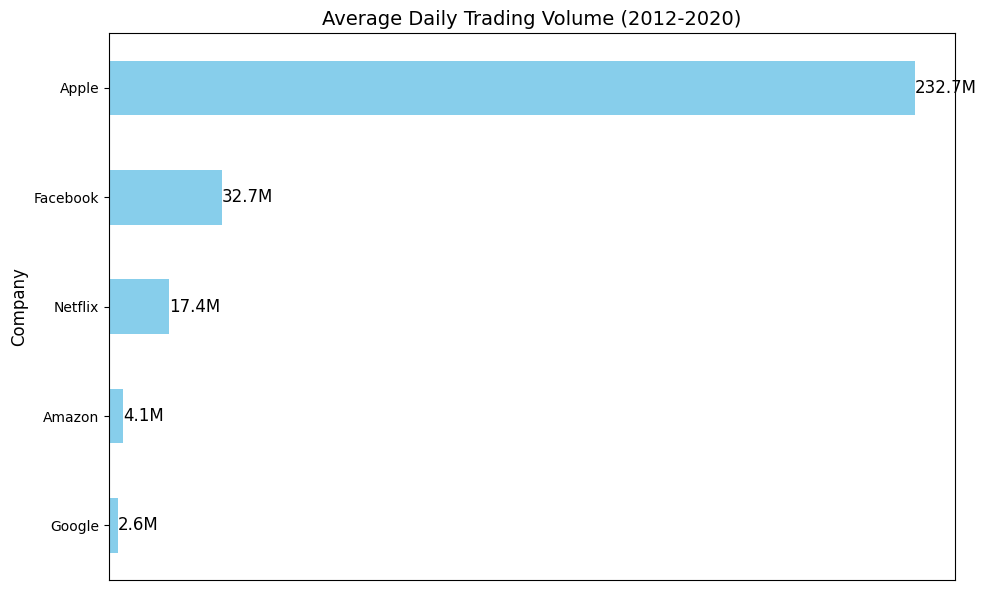

Company
Google        2.6M
Amazon        4.1M
Netflix      17.4M
Facebook     32.7M
Apple       232.7M
Name: Volume, dtype: object


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into 'faang_data' as per the given code

# Convert the date column to datetime format (if necessary)
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# Filter the data for the period 2012 to 2020
faang_data_filtered = faang_data[(faang_data['Date'].dt.year >= 2012) & (faang_data['Date'].dt.year <= 2020)]

# Group by company and calculate the average daily trading volume
average_volume = faang_data_filtered.groupby('Company')['Volume'].mean()

# Sort the companies by average daily trading volume in descending order
average_volume_sorted = average_volume.sort_values(ascending=True)

# Function to format numbers in a human-readable format (e.g., 230M)
def format_volume(vol):
    if vol >= 1e6:
        return f"{vol/1e6:.1f}M"
    elif vol >= 1e3:
        return f"{vol/1e3:.1f}K"
    else:
        return f"{vol:.0f}"

# Apply formatting to the volumes
formatted_volumes = average_volume_sorted.apply(format_volume)

# Create a horizontal bar plot to visualize the average daily trading volume
plt.figure(figsize=(10,6))
average_volume_sorted.plot(kind='barh', color='skyblue')

# Remove the x-axis
plt.gca().axes.get_xaxis().set_visible(False)

# Add titles and labels
plt.title('Average Daily Trading Volume (2012-2020)', fontsize=14)
plt.ylabel('Company', fontsize=12)

# Display the formatted labels on the bars
for i, v in enumerate(average_volume_sorted):
    plt.text(v, i, formatted_volumes[i], ha='left', va='center', color='black', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# For debugging: Display the raw numeric data (not formatted for the plot)
print(formatted_volumes)